<a href="https://colab.research.google.com/github/antonypaulson/Colab_Backup/blob/master/Exploratory_Data_Analysis_Google_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the necesscary Libraries for analysis
import numpy as np
import pandas as pd


In [0]:
#Importing the dataset into a pandas Dataframe
gplay_df = pd.read_csv('googleplaystore.csv')

In [0]:
#Displaying the head of the dataset
gplay_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
#Data Cleansing Procedure

###Number off Apps:
x = len(gplay_df)
print ('The number of records in the data set is: ', x)


The number of records in the data set is:  10841


In [0]:
#Removing duplicate Apps and filling Null values from the dataset:
gplay_df.drop_duplicates(subset='App', inplace=True)
y = len(gplay_df)
gplay_df.fillna(0) #Eliminating blank values and replacing with 0
print ('The number of unique App records in the data set is: ', y)


The number of unique App records in the data set is:  9660


In [0]:
#converting columns Size, Installs, Price into purely numeric columns

#Preparation for column Size
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('M', '') if 'M' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace(',', '') if '+' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('+', '') if '+' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: float(str(a).replace('k', ''))/1000 if 'k' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('Varies with device', 'NaN') if 'Varies with device' in str(a) else a)



#Preparation for column Installs
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace('+', '') if '+' in str(a) else a)
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace(',', '') if ',' in str(a) else a)
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace('Free', 'NaN') if 'Free' in str(a) else a)


#Preparation for column Price
gplay_df['Price'] = gplay_df['Price'].apply(lambda a: str(a).replace('$', '') if '$' in str(a) else a)
gplay_df['Price'] = gplay_df['Price'].apply(lambda a: str(a).replace('Everyone', 'NaN') if 'Everyone' in str(a) else a)

#Preparation for column Reviews
gplay_df = gplay_df[~gplay_df.Reviews.str.contains("3.0M")]

#Converting all the values of these columns to floats
gplay_df['Size'] = gplay_df['Size'].apply(lambda a : float(a))
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a : float(a))
gplay_df['Price'] = gplay_df['Price'].apply(lambda a : float(a))
gplay_df['Reviews'] = gplay_df['Reviews'].apply(lambda a: float(a))
gplay_df['Rating'] = gplay_df['Rating'].apply(lambda a: float(a))

In [0]:
#After cleaning these columns Checking the database once again:
z = len(gplay_df)
print ('The number of unique App records in the data set is: ', z)

The number of unique App records in the data set is:  9659


In [0]:
#Data Visualisation:
no_of_distinct_categories =  len(set(gplay_df['Category']))
print ('The dataset contains Apps belonging to', no_of_distinct_categories, 'Categories')

The dataset contains Apps belonging to 33 Categories


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


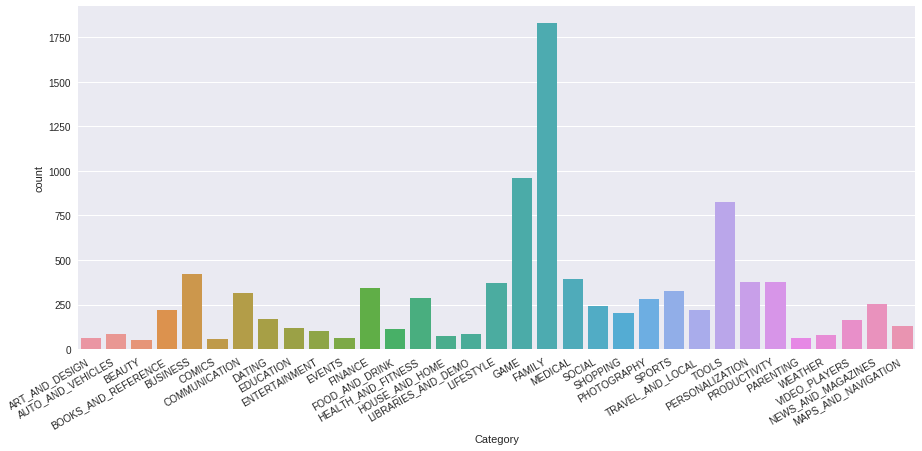

In [0]:
#Visualisation using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Number of categories of apps in the store
x = gplay_df.Category
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
fig.autofmt_xdate()
no_of_cat_plot = sns.categorical.countplot(x)
plt.show()



In [0]:
#The results of the above visualisation can be better represented in a table

cat_table = gplay_df.groupby('Category').size()
cat_table = cat_table.reset_index(name='Count').nlargest(10,'Count')
cat_table


,Category,Count
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395
23,PERSONALIZATION,376
25,PRODUCTIVITY,374
18,LIFESTYLE,369
12,FINANCE,345
28,SPORTS,325


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


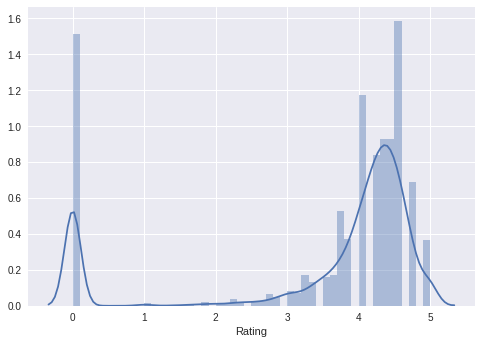

In [0]:
#Correlation Matrix to find which variables are important to prediction
#Heatmap 
import seaborn as sns
sns.distplot(gplay_df['Rating'])


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


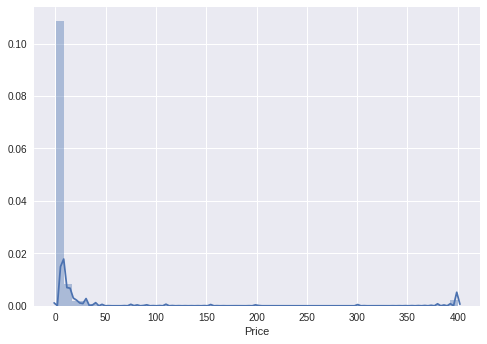

In [0]:
sns.distplot(gplay_df[gplay_df['Price']>0]['Price'])

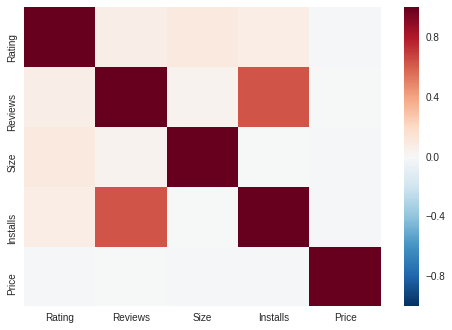

In [0]:
#Correlation Heatmap for numerical variables
sns.heatmap(gplay_df.corr())

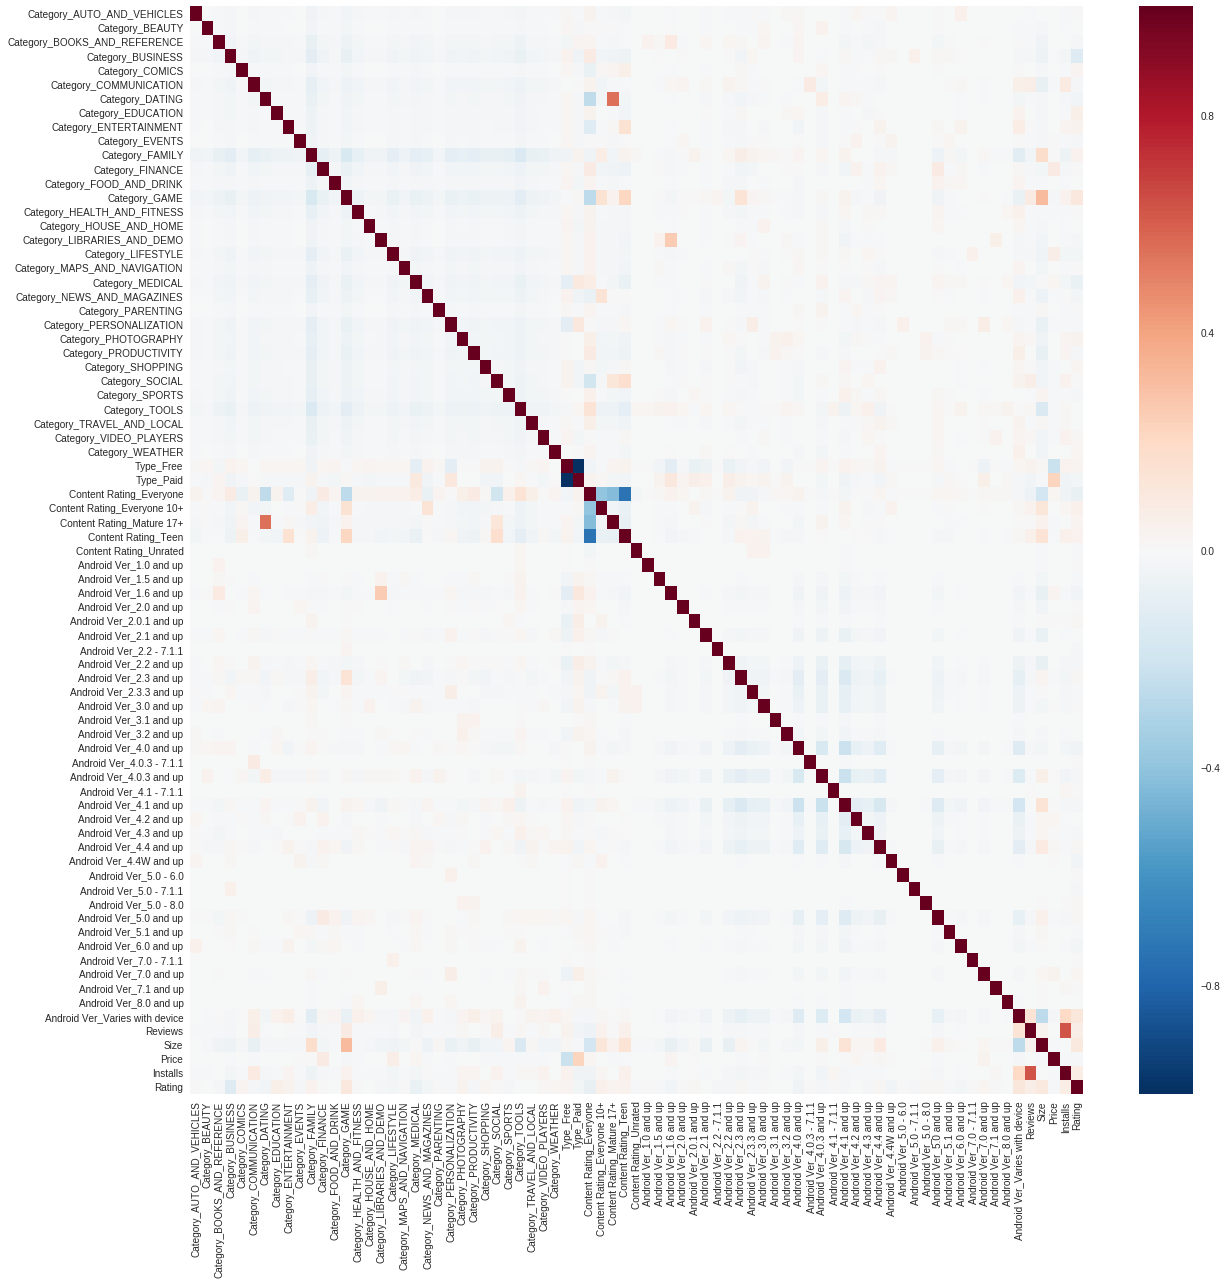

In [0]:
#Correlation for preproc_data
plt.figure(figsize = (20,20))
x = pd.concat([preproc_data, target], 1)
sns.heatmap(x.corr())

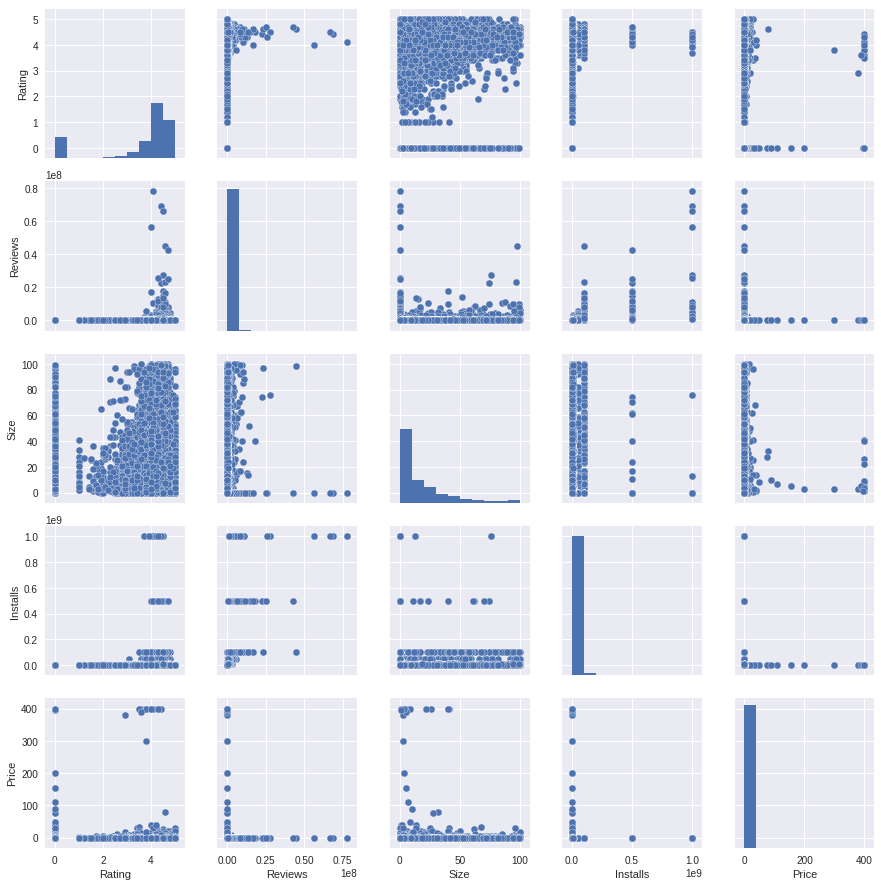

In [0]:
#Pairplots 

sns.pairplot(gplay_df)

In [0]:
#Prediction of user rating based on other parameters
gplay_df.head()
gplay_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [0]:
gplay_df = gplay_df.fillna(0)

In [0]:
#Preprocessing 

cat_columns = ['Category','Type','Content Rating', 'Android Ver']
num_columns = ['Reviews','Size','Price', 'Installs']
def preprocess(gplay_df):
  preprocess_features = pd.DataFrame()
  for i in cat_columns:
    preprocess_features[i] = gplay_df[i] 
    preprocess_features[i] = preprocess_features[i].astype('category')
  preprocess_features = pd.get_dummies(preprocess_features[cat_columns], drop_first = 'True')
  for i in num_columns:
    preprocess_features[i] = gplay_df[i].astype('float')
  #preprocess_features = preprocess_features.astype('float')
  return preprocess_features

def preprocess_target(gplay_df):
  output_targets = gplay_df['Rating'].astype('float')
  return output_targets

In [0]:
#Data after preprocessing
preproc_data = preprocess(gplay_df)
target = preprocess_target(gplay_df)

# #Validation Data
# validation_sample = preprocess(gplay_df.tail(2000))
# validation_target = preprocess_target(gplay_df.tail(2000))

In [0]:
print(preproc_data.shape)
print(target.shape)

(9659, 76)
(9659,)


In [0]:
from sklearn.model_selection import train_test_split as ts
#X_train - Variables for training
#X_test - Variables for testing
#y_train - Target variable for training
#y_test - Target variable for testing

X_train, X_test, y_train, y_test = ts(preproc_data, target, test_size=0.3, random_state=101)

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from tensorflow.python.data import Dataset
from tensorflow import keras
# Now this is where Keras the mighty comes in

# Now this is where Keras the mighty comes in

model = keras.Sequential([
    keras.layers.Dense(64, activation = tf.nn.relu,
                      input_shape = (preproc_data.shape[1],)),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = tf.nn.relu)
    
])

rms_optimizer = tf.train.AdamOptimizer()

#The loss is the mean square error and the metric used is the mean absolute error
model.compile(loss='mse',
             optimizer = rms_optimizer,
             metrics = ['mae'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4928      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 64)                256       
_______________________________________

In [0]:
#To check whether our model runs
class Dot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0 : print('')
    print ('.', end='')
    
set_epoch = 1000
tf.set_random_seed(1)

# Store training stats
fitting = model.fit(X_train, y_train, batch_size= 1000, epochs = set_epoch,
                   validation_data = (X_test,y_test), verbose = 0,
                   callbacks=[Dot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

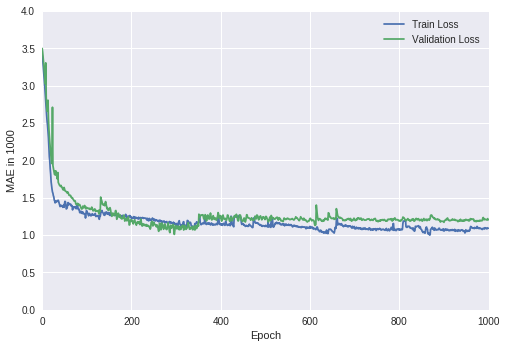

In [0]:
#Plotting the model
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MAE in 1000')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label = 'Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label = 'Validation Loss')
  plt.legend()
  plt.xlim([0,1000])
  plt.ylim([0,4])
plot_history(fitting)

In [0]:
model.predict(X_test)


array([[3.486736 ],
       [3.4770105],
       [3.4792929],
       ...,
       [3.4888797],
       [3.486092 ],
       [3.485917 ]], dtype=float32)

In [0]:
#Saving Measurements of the model
pred = model.predict(X_test)
from sklearn import metrics
mae_nn = metrics.mean_absolute_error(y_test,pred)
mse_nn = metrics.mean_squared_error(y_test, pred)
rmse_nn = np.sqrt(metrics.mean_squared_error(y_test, pred))

print( mae_nn, mse_nn, rmse_nn)

1.2032666771390506 2.536204480006958 1.5925465393535467


In [0]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()



In [0]:
#Fitting
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
pred1 = dt.predict(X_test)
mae_dt = metrics.mean_absolute_error(y_test,pred1)
mse_dt = metrics.mean_squared_error(y_test, pred1)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, pred1))

print( mae_dt, mse_dt, rmse_dt)

0.7643719806763285 2.1943693926846106 1.4813404040545881


In [0]:
#light gbm : Gradient boosted method for 

In [0]:
import lightgbm as lgb
var = np.arange(1,50,5)
#Grid Search for getting parameters

from sklearn.model_selection import GridSearchCV
gridParams = {
'learning_rate' : [0.1, 0.12, 0.14,0.16,0.18, 0.2],
    'num_leaves' : [ 20,21,22,23,24,25,26,27]
}

#model for gridsearch

mdl = lgb.LGBMRegressor(metric = 'mae',
                       objective = 'regression',
                       n_estimators= 20000,
                       bagging_fraction = 0.7,
                       num_threads = 4,
                       colsample_bytree = 0.7,
                       num_boost_round = 100)

grid = GridSearchCV(mdl, gridParams, verbose =4, n_jobs = -1, scoring = 'neg_mean_absolute_error')


In [0]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMRegressor(bagging_fraction=0.7, boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.7, importance_type='split', learning_rate=0.1,
       max_depth=-1, metric='mae', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=20000,
       n_job...      reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.12, 0.14, 0.16, 0.18, 0.2], 'num_leaves': [20, 21, 22, 23, 24, 25, 26, 27]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=4)

In [0]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1, 'num_leaves': 25}
-0.6325090930392946


In [0]:
import lightgbm as lgb

param = {'learning_rate': 0.1, 'boosting_type': 'gbdt', 'num_leaves':25, 'nthread':4, 'num_trees':100, 'objective': 'regression', 'metric':'mse'}


In [0]:
train_data = lgb.Dataset(X_train, y_train, silent =False)
test_data = lgb.Dataset(X_test, y_test, silent = False)

lgbt = lgb.train(param, train_set = train_data, num_boost_round =20, verbose_eval =4)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [0]:
pred2 = lgbt.predict(X_test, num_iteration = lgbt.best_iteration)

mae_lgb = metrics.mean_absolute_error(y_test,pred2)
mse_lgb = metrics.mean_squared_error(y_test, pred2)
rmse_lgb = np.sqrt(metrics.mean_squared_error(y_test, pred2))

print( mae_lgb, mse_lgb, rmse_lgb)

0.6231696962356382 1.0653789968613863 1.0321719802733391


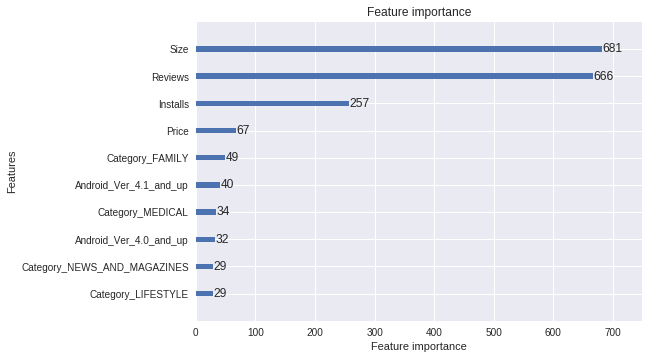

In [0]:
#visualizing important predictors
import matplotlib.pyplot as plt 

lgb.plot_importance(lgbt, max_num_features = 10)

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
pred3 = lr.predict(X_test)

mae_lr = metrics.mean_absolute_error(y_test,pred3)
mse_lr = metrics.mean_squared_error(y_test, pred3)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, pred3))

print( mae_lr, mse_lr, rmse_lr)

1.14757822960386 2.4257400172090935 1.5574787373216668


In [0]:
# arange for creating a range of values  
# from min value of X to max value of X  
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(training_target), max(training_target), 0.001)
  
# reshape for reshaping the data into  
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((4000, 1))  
  
# scatter plot for original data 
plt.scatter(validation_sample, validation_target, color = 'red') 
  
# plot predicted data 
plt.plot(validation_sample, regressor.predict(validation_sample), color = 'blue')  
  
# specify title 
plt.title('Profit to Production Cost (Decision Tree Regression)')  
  
# specify X axis label 
plt.xlabel('Production Cost') 
  
# specify Y axis label 
plt.ylabel('Profit') 
  
# show the plot 
plt.show()

In [0]:
regressor.predict(validation_target)